# Clustering of CNS drugs

###### (Dataset taken from - Predicting CNS Permeability of Drug Molecules: Comparison of Neural Network and Support Vector Machine Algorithms SCOTT DONIGER,1 THOMAS HOFMANN,2 and JOANNE YEH1,3)

## 1. Importing dataset from csv file and preprocessing

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
dataset = pd.read_csv("D:\Google Drive\Drug Discovery\Dataset\CNS_drugs.csv")
dataset.head()

,Name,MW,Volume,SA,%hydro,logP,HLB,Hacc,Hdonor,H3d,CNS
0,acepromazine,442.5290,62.8703,9.176,100.0000,-0.8860,20.0000,1.0444,0.56601,15.7038,1
1,acetophenazine,527.6340,62.5695,9.128,100.0000,-0.8860,20.0000,1.0444,0.56601,15.7038,1
2,acetozalmide,222.2364,123.6950,17.510,92.0981,-2.9723,19.7280,1.1860,0.88182,22.0383,1
3,allobarbitol,208.2164,156.9770,23.020,50.2567,0.5750,12.1100,1.3253,0.56084,11.7318,1
4,amantadine,151.2510,87.9156,10.780,15.3762,2.3950,2.1187,0.5076,0.35920,6.2357,1


In [5]:
dataset.tail()

,Name,MW,Volume,SA,%hydro,logP,HLB,Hacc,Hdonor,H3d,CNS
320,valinomycin,1111.330,705.075,97.18,49.8064,0.4756,14.1550,4.9882,1.50676,8.46004,-1
321,verapamil,454.608,284.776,37.21,27.0892,4.1860,8.8036,0.6603,0.03466,8.34602,-1
322,warfarin,308.333,167.236,19.90,31.5172,3.1400,8.1120,0.7801,0.32007,9.33301,-1
323,yohimbine,354.448,198.626,23.76,32.0197,1.4940,7.9620,1.0433,0.50342,11.54560,-1
324,zidovudine,267.244,151.885,20.12,89.3704,-2.0662,18.8750,2.0797,0.50174,13.84770,-1


### Taking only CNS permeable drugs with CNS column label as 1 and shufflling the dataset

In [6]:
from sklearn.utils import shuffle

In [7]:
df_active = dataset[dataset['CNS']==1] 
df_active = shuffle(df_active)
df_active.head()

,Name,MW,Volume,SA,%hydro,logP,HLB,Hacc,Hdonor,H3d,CNS
132,perphenazine-HCl,403.969,253.4860,32.04,51.0623,4.2050,10.6280,0.5335,0.27047,10.35980,1
39,clonazepam,315.715,167.3850,20.34,61.8423,2.6133,14.2270,0.9891,0.30584,9.86385,1
65,etaqualone,264.326,149.5140,17.78,19.7002,2.8803,6.9654,0.3903,0.04460,6.24421,1
89,kynurenicacid,189.170,95.6217,11.46,62.6617,0.9390,13.2240,1.0214,0.57610,16.17810,1
26,capuride,186.253,113.7220,16.06,37.3288,0.1500,10.6380,1.2563,0.78814,10.64410,1


## 2. Scaling the dataset

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
dat_mod = df_active.iloc[:,1:10]
scaler = StandardScaler()
dat_mod[['MW','Volume', 'SA','%hydro', 'logP', 'HLB','Hacc', 'Hdonor', 'H3d']] = scaler.fit_transform(dat_mod[['MW','Volume', 'SA','%hydro', 'logP', 'HLB','Hacc', 'Hdonor', 'H3d']])
dat_mod.head()

,MW,Volume,SA,%hydro,logP,HLB,Hacc,Hdonor,H3d
132,1.066936,1.307992,1.275226,0.393237,0.930614,0.123007,-0.394993,-0.140841,0.180236
39,0.214669,-0.019332,-0.151733,0.830061,0.158543,0.847885,0.878801,0.009776,0.028228
65,-0.281593,-0.294830,-0.463956,-0.877610,0.288054,-0.614680,-0.795360,-1.102672,-1.081188
89,-1.007373,-1.125628,-1.234758,0.863264,-0.653594,0.645870,0.969107,1.160636,1.963540
26,-1.035543,-0.846596,-0.673731,-0.163269,-1.036307,0.125021,1.625855,2.063574,0.267374


## 3. Computing and visualising correlation in the dataset

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Correlation table 
#### High positive value shows positive linear relationship
#### High neg shows negative linear relationship

In [11]:
df = dat_mod.copy()
df.corr()

,MW,Volume,SA,%hydro,logP,HLB,Hacc,Hdonor,H3d
MW,1.000000,0.598258,0.572481,0.128245,0.289329,0.094525,0.141479,-0.178241,0.029019
Volume,0.598258,1.000000,0.989046,-0.429715,0.629226,-0.399178,-0.125493,-0.445795,-0.359346
SA,0.572481,0.989046,1.000000,-0.403888,0.593484,-0.376790,-0.100582,-0.409678,-0.341633
%hydro,0.128245,-0.429715,-0.403888,1.000000,-0.638267,0.964508,0.505073,0.426336,0.646590
logP,0.289329,0.629226,0.593484,-0.638267,1.000000,-0.679557,-0.525078,-0.522112,-0.615013
HLB,0.094525,-0.399178,-0.376790,0.964508,-0.679557,1.000000,0.525338,0.372572,0.603235
Hacc,0.141479,-0.125493,-0.100582,0.505073,-0.525078,0.525338,1.000000,0.774100,0.583704
Hdonor,-0.178241,-0.445795,-0.409678,0.426336,-0.522112,0.372572,0.774100,1.000000,0.636627
H3d,0.029019,-0.359346,-0.341633,0.646590,-0.615013,0.603235,0.583704,0.636627,1.000000


### Heatmap of correlations
#### Deep red regions denote positive linear relationship
#### Deep blue regions denote negative linear relationship

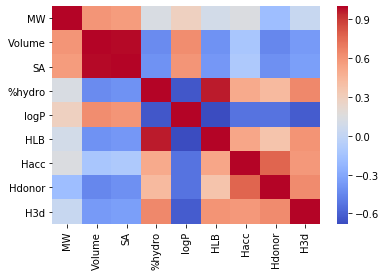

In [12]:
sns.heatmap(df.corr(), cmap="coolwarm")

## 4. PCA for plotting the data points and clustering

In [13]:
from sklearn.decomposition import PCA

### No. of dimensions have been reduced to 2 - pc1, pc2  after carrying out PCA

In [14]:
pca = PCA(n_components=2)
pComponents = pca.fit_transform(df)
pDf = pd.DataFrame(data = pComponents
             , columns = ['pc1', 'pc2'])

In [15]:
pDf.head()

,pc1,pc2
0,-1.260716,1.798765
1,0.868711,0.755303
2,-1.383886,-1.416781
3,3.104290,-0.462303
4,2.305672,-0.530121


## 5. Clustering on PCA output using K-Means clustering

In [16]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

## Elbow method to find the optimum no. of clusters
#### The elbow is at around 2 - We proceed with 2 clusters

### Elbow method carried out on the sclaed dataset (without dimensionality reduction) - 8 columns

#### In the plot, k is the no. of clusters and distortion captures the internal cluster distance. As no. of clusters increase, distance decrease. We need to find the elbow point, after which the improvement is not significant. In this particular problem set, the elbow is not very prominent. But it can concluded that it is at 2.

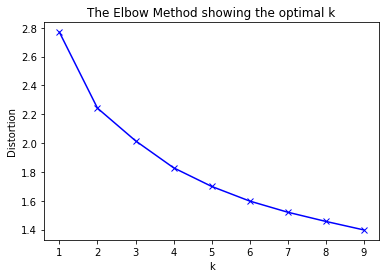

In [17]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k).fit(df)
    km.fit(df)
    distortions.append(sum(np.min(cdist(df, km.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Elbow method carried out on PCA output dataframe pDf with 2 columns

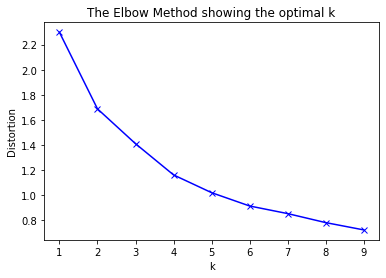

In [18]:
# determine k using pDf
distortions = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k).fit(pDf)
    km.fit(pDf)
    distortions.append(sum(np.min(cdist(pDf, km.cluster_centers_, 'euclidean'), axis=1)) / pDf.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Clustering using K-Means with no. of clusters as 2 on the PCA output dataframe

In [19]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(pDf)

### Cluster output for 2 clusters, x axis - pc1, y axis - pc2. Different clusters are plotted with different colours. Black circles represents the cluster centers. 

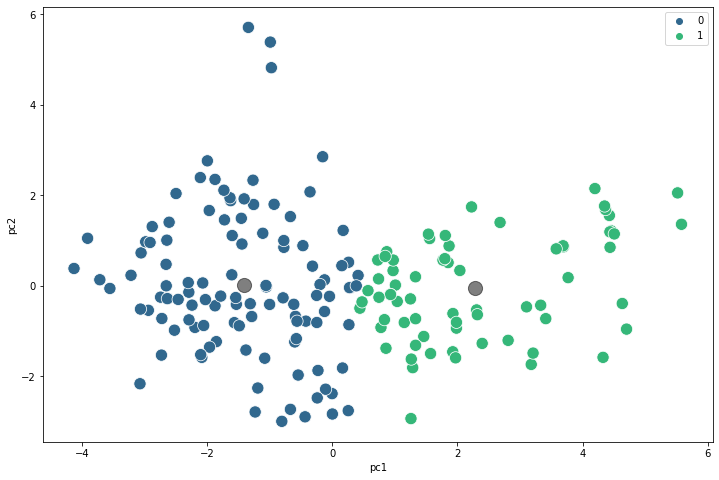

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot( pDf.iloc[:, 0], pDf.iloc[:, 1], hue=clusters, cmap='virdis', s=150, ax=ax, palette="viridis")

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()